# Project Python Foundations: FoodHub Data Analysis

**Marks: 60 points**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UT Austin AI Course/foodhub_order.csv') ## Fill the blank to read the data
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Check the shape of the dataset
df.shape ## Fill in the blank

(1898, 9)

**There are 1898 rows and 9 columns in our data**

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Details of the data types are listed above**

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [ ]:
# Checking for missing values in the data
df.isnull().sum()  #Write the appropriate function to print the sum of null values for each column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

**There aren't any missing values in our data! 🙂**

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Get the summary statistics of the numerical data
df['food_preparation_time'].describe() ## Write the appropriate function to print the statitical summary of the data (Hint - you have seen this in the case studies before)

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

*   **Minimum**: 20 minutes
*   **Maximum**: 35 minutes
*   **Average**: 27.37 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df['rating'].value_counts() ## Complete the code

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

**736 orders are not rated because in the data they are not given**

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

#### Customer ID

In [ ]:
# check unique customer ID
df['customer_id'].nunique()  ## Complete the code to find out number of unique Customer ID

1200

#### Restaurant name

In [ ]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ## Complete the code to find out number of unique Restaurant Name

178

#### Cuisine type

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique() ## Complete the code to find out  number of  unique cuisine type

14

<Axes: xlabel='cuisine_type', ylabel='count'>

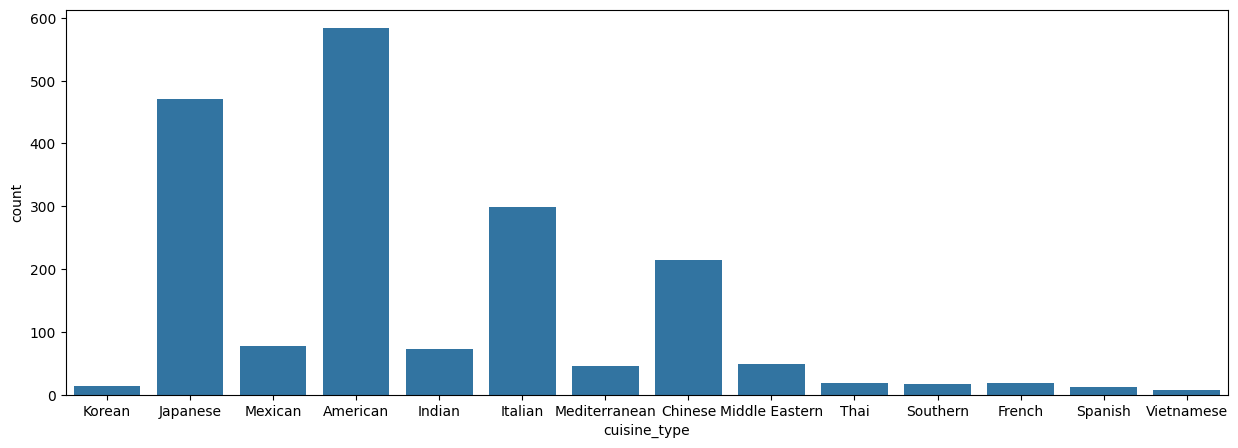

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.

**There is a large amount of Japanese and American food cuisine orders in our dataset**

This distribution shows that American (584 orders) and Japanese (470 orders) cuisines are the most popular among the orders, with the largest number of orders. In contrast, Vietnamese, Spanish, Korean, and several other cuisines have fewer orders, indicating a preference or availability bias towards certain cuisines within this dataset

#### Cost of the order

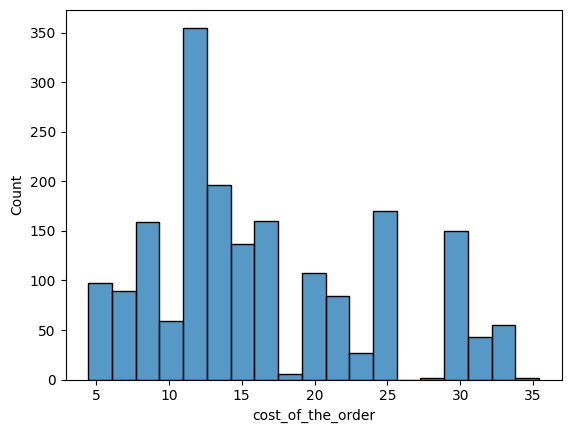

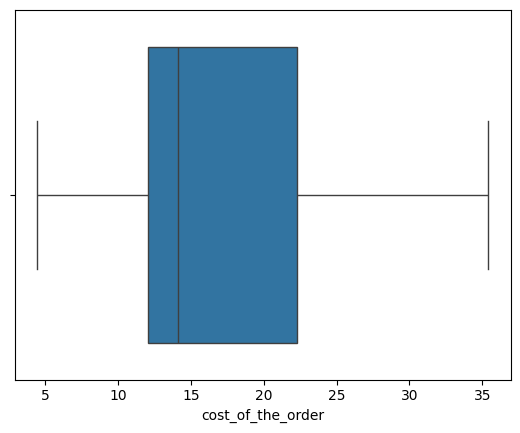

In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

**The orders are priced fairly moderately with most orders in the $10-15 range**

The data is right-skewed and the presence of orders costing near the maximum suggests there are some relatively expensive orders, but the bulk of the orders are more moderately priced, as reflected by the median and the quartiles

#### Day of the week

In [ ]:
# # Check the unique values
df['day_of_the_week'].nunique() ## Complete the code to check unique values for the 'day_of_the_week' column

2

<Axes: xlabel='day_of_the_week', ylabel='count'>

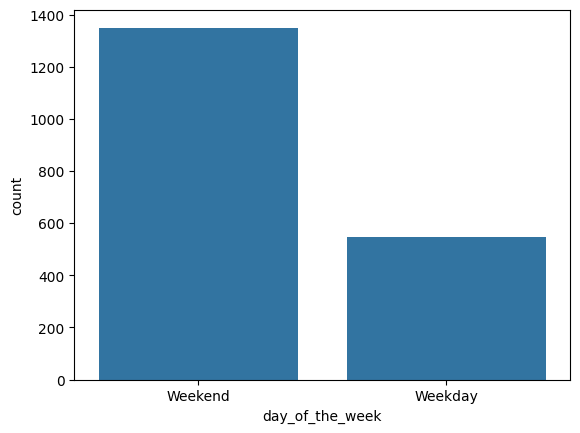

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week') ## Complete the code to plot a bar graph for 'day_of_the_week' column

**The majority of orders (~70%) were placed on the weekend**

This data shows a significant preference for placing food orders during the weekend, with more than twice as many orders on weekends compared to weekdays. This pattern could suggest that customers are more likely to order food for delivery when they are off work or engaged in leisure activities, highlighting weekends as peak times for the food delivery service

#### Rating

In [ ]:
# Check the unique values
df['rating'].nunique() ## Complete the code to check unique values for the 'rating' column

4

In [ ]:
# Count the number of orders for each rating
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

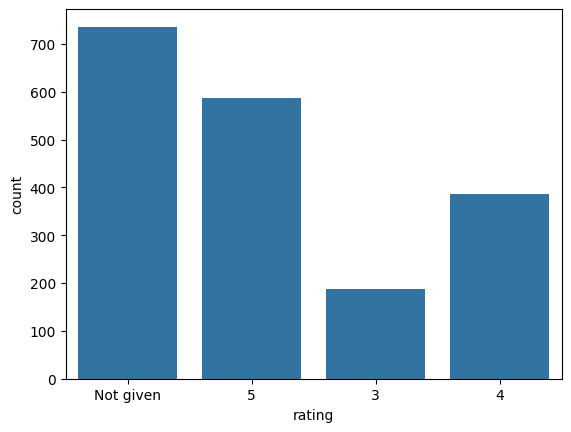

In [ ]:
sns.countplot(data = df, x = 'rating') ## Complete the code to plot bar graph for 'rating' column

**About 38% of the orders were not rated, but a significant portion of orders rated were in the five and four star range**

We can conclude:

1.   A significant proportion of orders were not rated: Nearly 39% of all orders did not have a given rating. This could be due to customers choosing not to leave feedback or the absence of a requirement for customers to rate their orders.
2.   High satisfaction among those who rated: Among the orders that were rated, a considerable portion received high ratings (5 and 4), indicating a generally positive experience. Specifically, more than half of the rated orders (about 51% when considering only the rated orders) received the highest rating of 5.

3. Lower instances of medium satisfaction: Only about 10% of orders received a rating of 3, indicating fewer orders fell into the medium satisfaction category.

Overall, the ratings suggest that when customers chose to rate their orders, they were predominantly satisfied with their experience. However, the high percentage of orders not rated points to a potential area for improvement in encouraging or incentivizing customers to provide feedback.

#### Food Preparation time

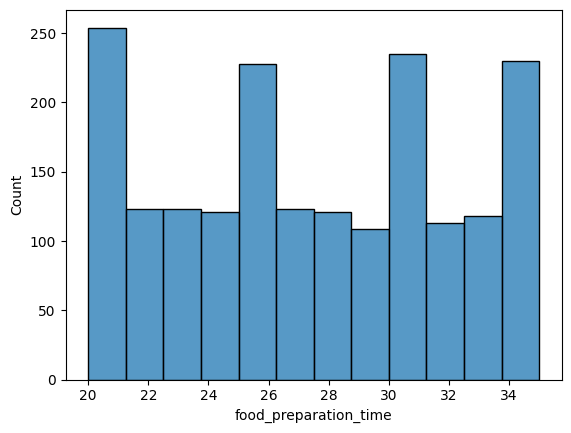

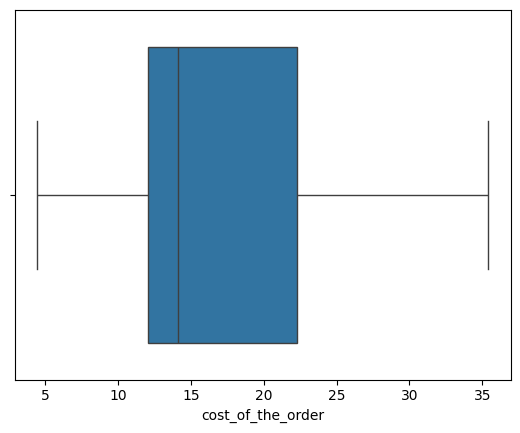

In [ ]:
sns.histplot(data=df,x='food_preparation_time') ## Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Complete the code to plot the boxplot for the cost of order
plt.show()

**Food Preparation Time**

The histogram for food preparation time shows a fairly symmetrical distribution, indicating that the time taken to prepare food tends to center around a common range. There are no significant outliers, and the distribution appears to be roughly normal. This suggests a consistent level of efficiency across food preparation processes for different orders.

**Cost of the order**

The boxplot for the cost of the order reveals a range of order costs with a median below the mean, suggesting a right-skewed distribution. The presence of outliers on the higher cost side indicates that while most of the orders fall within a reasonable price range, there are some orders significantly more expensive than the rest. The interquartile range (IQR) shows the middle 50% of the data, highlighting the variability in order costs.

**Summary**

Food preparation times are generally consistent, pointing towards standardized processes across orders. Order costs, however, vary more significantly, with a skew towards lower-cost orders and some higher-cost outliers. This variation in cost could reflect differences in order type, cuisine specialization, and individual restaurant pricing

#### Delivery time

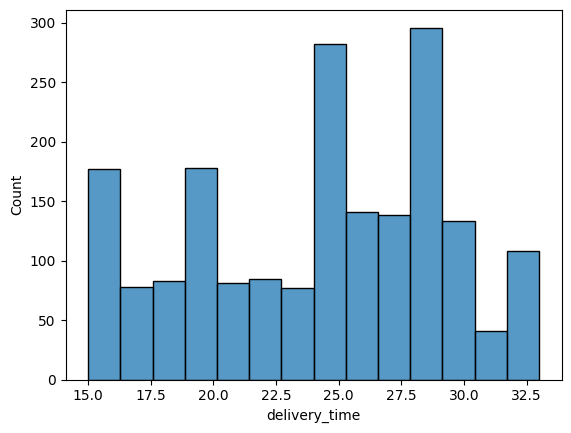

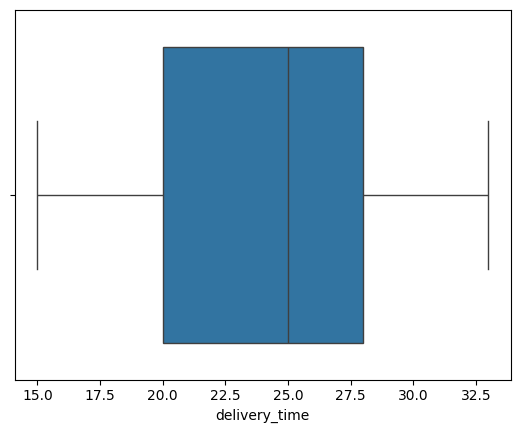

In [ ]:
sns.histplot(data=df,x='delivery_time') ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Complete the code to plot the boxplot for the delivery time
plt.show()

**Delivery Time Histogram**

The histogram shows the distribution of delivery times with a somewhat normal but slightly right-skewed distribution. This indicates that while most deliveries are completed within a certain time frame, there are a few deliveries that take significantly longer than average

**Delivery Time Boxplot**

The boxplot provides a visual summary of the delivery times, showing the median, quartiles, and any potential outliers. The median delivery time is marked by the line inside the box, indicating the midpoint of the data. The interquartile range (IQR) represented by the box shows the middle 50% of the data, highlighting the typical spread of delivery times. In this plot, while there might be slight variations, there doesn't appear to be a significant number of outliers, showing that extreme delivery times are not common.

**Summary**

The delivery time analysis suggests that while the service generally maintains consistent delivery times, there are cases where deliveries take longer. The overall efficiency of the delivery process seems to be strong, with most deliveries falling within an expected range, but there is room for improvement in reducing longer delivery times to improve customer satisfaction.

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5) ## Complete the code

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

**Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm had the highest number of orders received**



### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head(1) ## Complete the code to check unique values for the cuisine type on weekend

American    415
Name: cuisine_type, dtype: int64

**The most popular cuisine type ordered on weekends is American cuisine, with 415 orders**

### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]


In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


**The number of orders that cost above 20 dollars is 555 and the percentage is 29.24%**

### **Question 10:** What is the mean order delivery time? [1 mark]

In [ ]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


**The mean order delivery time is 24.16 minutes**

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(3)  ## Write the appropriate column name to get the top 5 most frequent customers

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


**Top 3 most frequent customers by Customer ID**
1.   Customer ID: 52832 with 13 orders
2.   Customer ID: 47440 with 10 orders
3.   Customer ID: 83287 with 9 orders



In [ ]:
# Filter the dataset to get the orders placed by the top 3 customers
top_customer_orders = df[df['customer_id'].isin([52832, 47440, 83287])]
# Sort the table by customer ID
top_customers_orders_sorted_by_id = top_customer_orders.sort_values(by='customer_id')
# Show the table
top_customers_orders_sorted_by_id

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1811,1477664,47440,Blue Ribbon Fried Chicken,American,29.30,Weekend,4,28,16
264,1477909,47440,Blue Ribbon Fried Chicken,American,12.18,Weekend,Not given,31,23
1359,1477903,47440,Bareburger,American,16.25,Weekend,Not given,32,28
398,1478120,47440,Blue Ribbon Fried Chicken,American,8.10,Weekend,Not given,33,22
1306,1476559,47440,Bareburger,American,15.57,Weekday,4,24,28
579,1477178,47440,Bareburger,American,24.20,Weekend,4,23,23
674,1476982,47440,Bareburger,American,8.73,Weekend,5,21,19
778,1477481,47440,Bareburger,American,25.22,Weekday,3,31,27
807,1477594,47440,Bareburger,American,12.18,Weekday,3,25,24
824,1476854,47440,Blue Ribbon Fried Chicken,American,6.45,Weekend,4,30,24


### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

<ipython-input-41-84fcf8149c50>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = "cuisine_type", x = "cost_of_the_order", data = df, palette = 'PuBu')


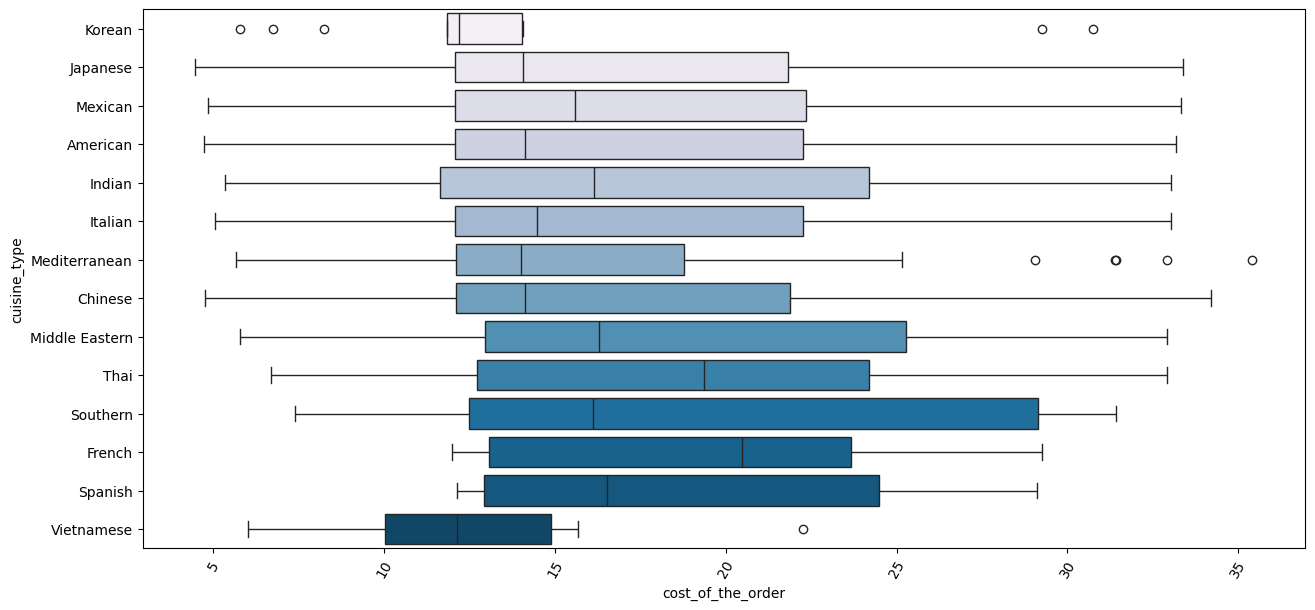

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(y = "cuisine_type", x = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

**Observations based on data plot**

1.   Certain cuisines, like Japanese, French, and Middle Eastern, show a wider range in the cost of orders, indicating significant variability in pricing. This might reflect a diversity in menu options, from more affordable to premium dishes
2.   Japanese and French cuisines appear to have higher median costs, indicating that these cuisines, on average, offer more expensive dishes. In contrast, cuisines like American and Italian have lower median costs, suggesting more moderate pricing on average
3.   There are outliers, especially in cuisines like American, Japanese, and Italian, that point to some orders being significantly more expensive than the typical range for those cuisines. These could be special dishes, large orders, or premium menu items
4.   Cuisines with tighter boxes and fewer outliers, such as Korean and Vietnamese, suggest more consistent pricing within those cuisine types. This consistency could imply a more standardized menu or less variation in dish prices
5.   Some cuisines like Vietnamese, Mediterranean, and Korean show a lower overall cost range and median, which might indicate these cuisines are more affordable on average compared to others like Southern or Indian



#### Cuisine vs Food Preparation time

<ipython-input-40-d46e0e327747>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='food_preparation_time', y='cuisine_type', data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot


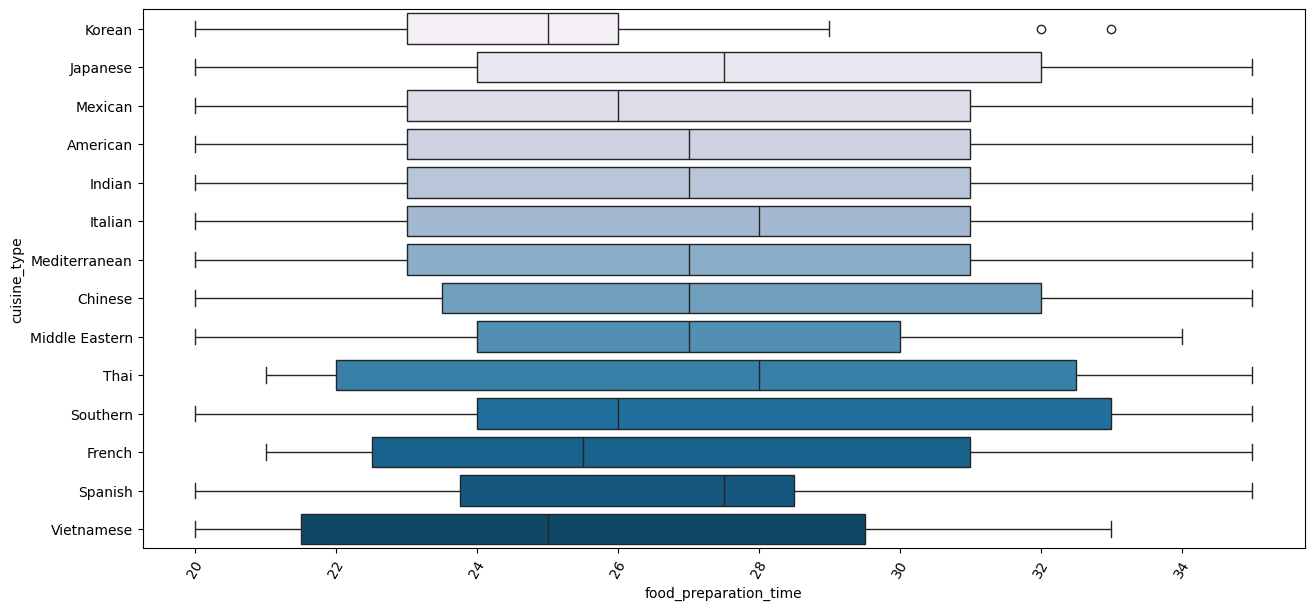

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x='food_preparation_time', y='cuisine_type', data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

**Observations based on data plot**

1.   The medians of food preparation times are relatively uniform across different cuisines, suggesting a standardization in the preparation process or a balancing of menu items to ensure consistent preparation times, regardless of the cuisine type
2.   While medians are uniform, there's noticeable variability within each cuisine type, as shown by the lengths of the boxes and the whiskers. This indicates that, although the average (median) preparation time is similar, each cuisine includes dishes that vary significantly in preparation time.
3.   Several cuisines display outliers like Korean and Japanese, indicating that there are specific dishes within these cuisines that take significantly more or less time to prepare than the majority of dishes. This could be due to the complexity of preparation techniques, special ingredients that require longer cooking times, or simpler dishes that are quicker to prepare.
4.   No single cuisine stands out as having a markedly longer or shorter preparation time when considering the median values, which suggests a deliberate effort to keep preparation times manageable across all cuisine offerings. However, the variability and outliers within each cuisine type highlight the diversity of the menu offerings
5.   The consistency in median preparation times across cuisines could reflect effective kitchen management and the optimization of preparation processes to meet delivery timelines. The presence of outliers may offer opportunities for menu optimization or could simply reflect the breadth of the culinary experience the service aims to provide.
6.   While the boxplot does not single out any one cuisine as being particularly time-intensive or quick to prepare, it does reveal the internal complexity of each cuisine's offerings. For example, cuisines with wider interquartile ranges or more outliers might offer a more diverse menu that spans from quick bites to more elaborate dishes.



#### Day of the Week vs Delivery time

<ipython-input-6-671b71ab996b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, palette="PuBu")  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot


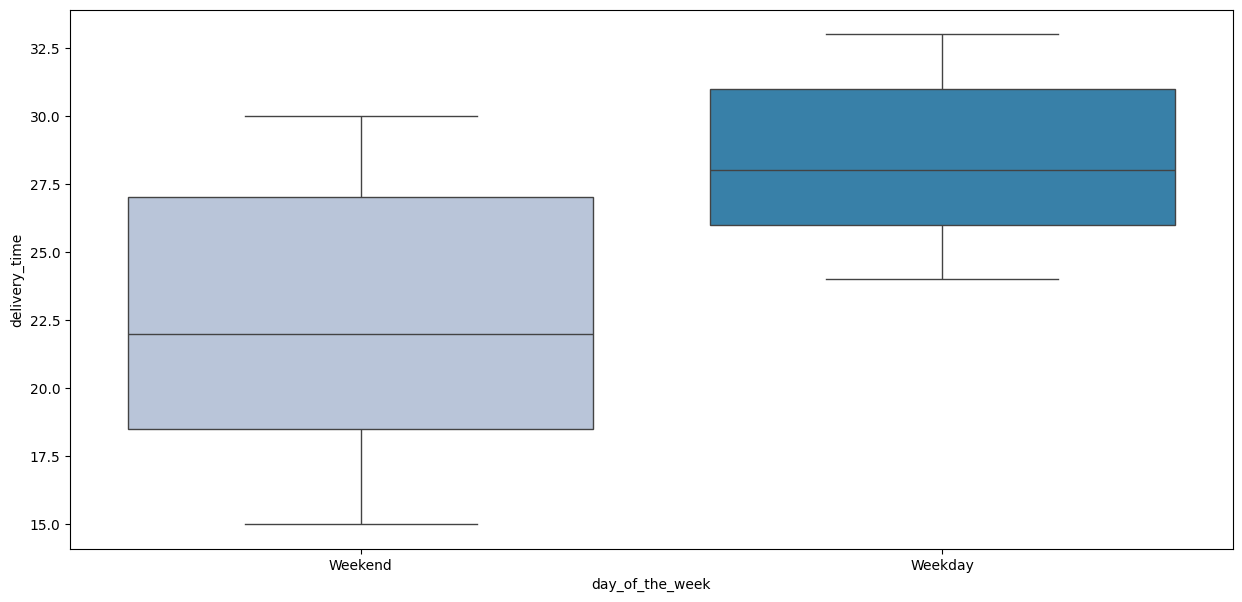

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, palette="PuBu")  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

**Observations based on data plot**

1.   The median delivery time is significantly lower on the weekends than weekdays indicating a systematic variation in how quickly orders are delivered depending on the day. A higher median on weekdays might suggest that delivery takes longer due to higher order volumes or potentially slower traffic conditions
2.   There is a greater variability of delivery times for the weekends given the wider IQR which suggests that there is greater inconsistency in times compared to the more consistent weekday delivery times. It could also suggest that there is more volume of orders placed on the weekends versus the weekday, leading to the higher variability
3.   Delivery times are consistently longer on weekends so the platform might consider increasing the number of delivery personnel or implementing efficiency measures to improve service during these peak times



#### Run the below code and write your observations on the revenue generated by the restaurants.

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

***Observations***

1.   **Shake shack leads in revenue**
*   Shake Shack tops the list with a significant revenue of $3579.53, indicating a high volume of orders or higher-priced menu items, making it the most popular or preferred choice among customers on this platform

2.   **Diverse Cuisine Representation**
*   The list includes a variety of cuisines, from American (Shake Shack, The Meatball Shop, Blue Ribbon Fried Chicken) to Japanese (Blue Ribbon Sushi, Sushi of Gari 46) and Italian (Parm, Rubirosa), suggesting a diverse customer base with varied food preferences

3.   **Blue Ribbon Brand Popularity**
*   The Blue Ribbon brand appears multiple times (Sushi, Fried Chicken, Sushi Bar & Grill), indicating its popularity across different cuisine types and its success in attracting customers

4.   **High End Dining Options**
*   Restaurants like TAO and Nobu Next Door, known for their upscale dining experiences, also appear on the list, showing that customers are willing to spend on premium options through the platform

5.   **Casual Dining and Fast Food Presence**
*   Alongside upscale dining options, the list also includes casual dining and fast-food restaurants like Five Guys Burgers and Fries, showcasing the platform's appeal to a broad range of dining preferences and occasions

6.  **Revenue Concentration**
*   The descending order of revenue suggests a concentration of spending among the top restaurants. Shake Shack, as the leader, generates significantly more revenue than restaurants further down the list, highlighting the existence of strong preferences or possibly more extensive availability and marketing reach

The observations suggest that the platform caters to a wide range of customer preferences, from fast food to upscale dining, with certain restaurants capturing a larger share of the market. The success of these top restaurants could be attributed to several factors, including food quality, brand recognition, menu diversity, and pricing strategies



#### Rating vs Delivery time

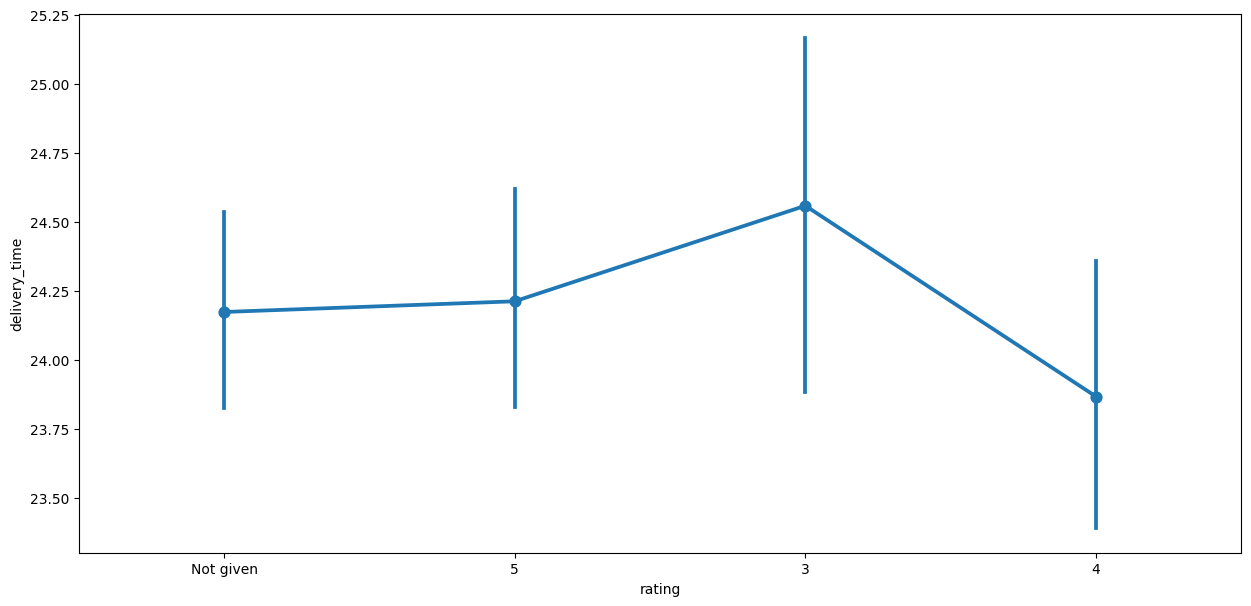

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

***Observations***

1.   **Lower ratings correlate with longer delivery times**
*   The plot shows that shorter delivery times correlate with higher ratings, suggesting that efficiency in delivery impacts customer satisfaction
2.   **Delivery time variations are higher amongst orders withlonger delivery times**
*   A longer delivery time bar for 3 star reviews suggests greater variability in delivery times for orders with that rating, which indicate inconsistency in delivery performance. The orders with higher ratings and not given ratings Aisne, much lower variability in delivery



#### Rating vs Food preparation time



<ipython-input-7-fad6b6d95001>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='rating', y='food_preparation_time', data=df, palette='PuBu')  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot


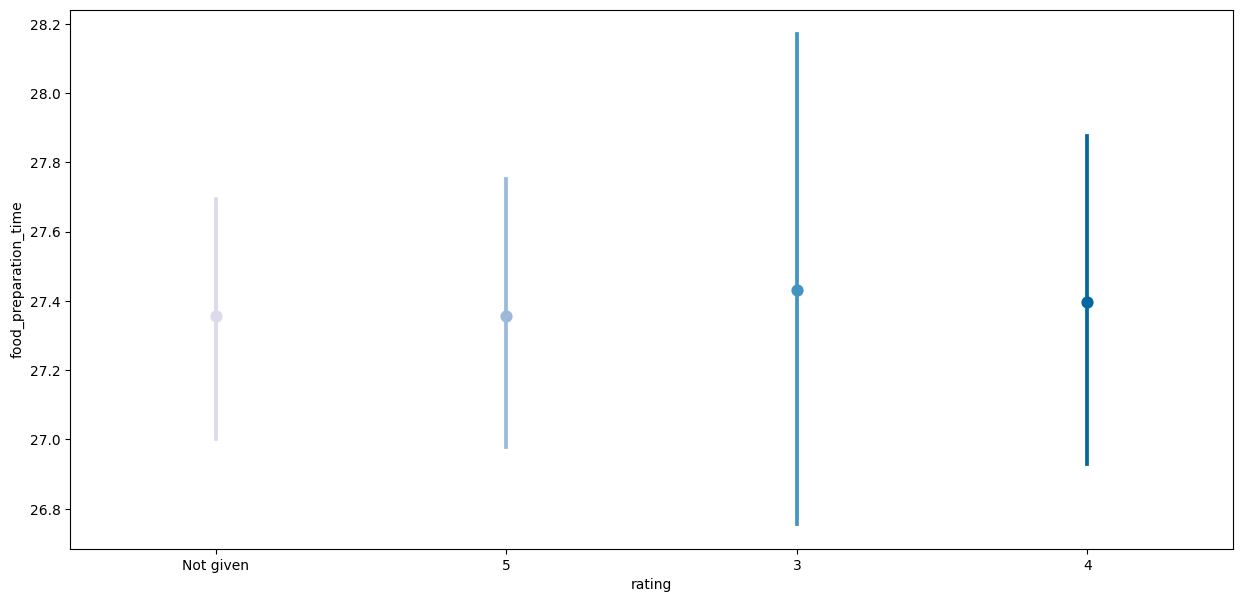

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='food_preparation_time', data=df, palette='PuBu')  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

***Observations***

1.   Lower ratings are correlated with longer delivery times
2.   Variation of food prep times are higher the lower the rating



#### Rating vs Cost of the order

<ipython-input-8-4a242de5869f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='rating', y='cost_of_the_order', data=df, palette='PuBu')   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot


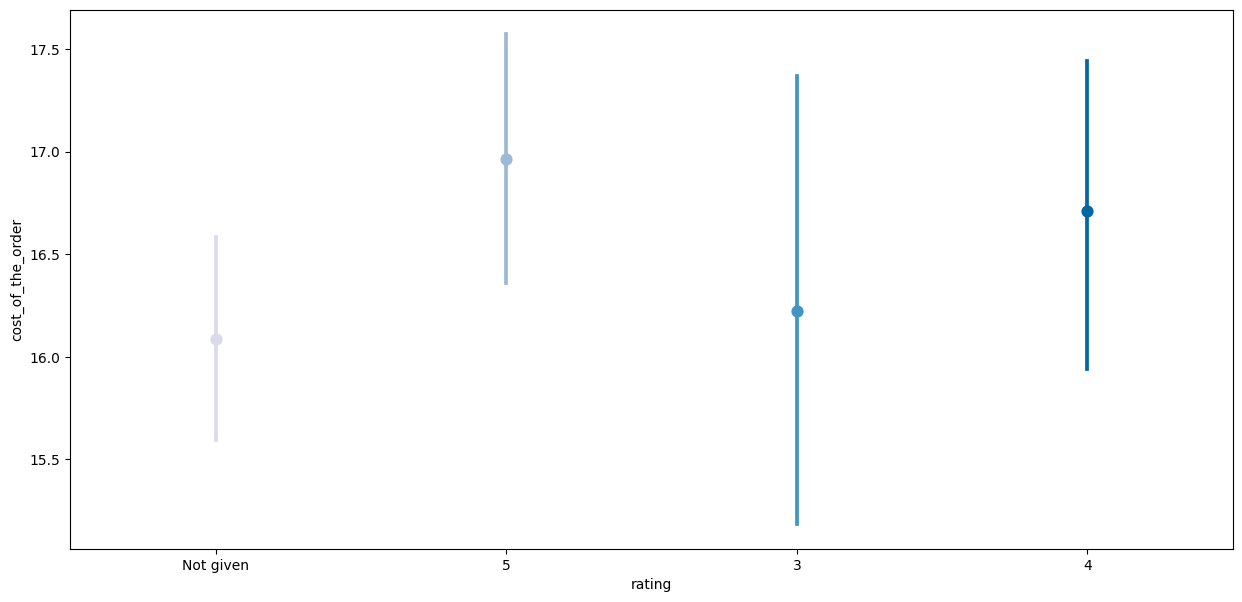

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='cost_of_the_order', data=df, palette='PuBu')   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

***Observations***

1.   Lower ratings are correlated with lower prices of the order
2.   Variation of food prices are higher the lower the rating
3.   The higher prices meals may come with more scrutiny given lower ratings



#### Correlation among variables

<ipython-input-12-cdf8b4e06760>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")


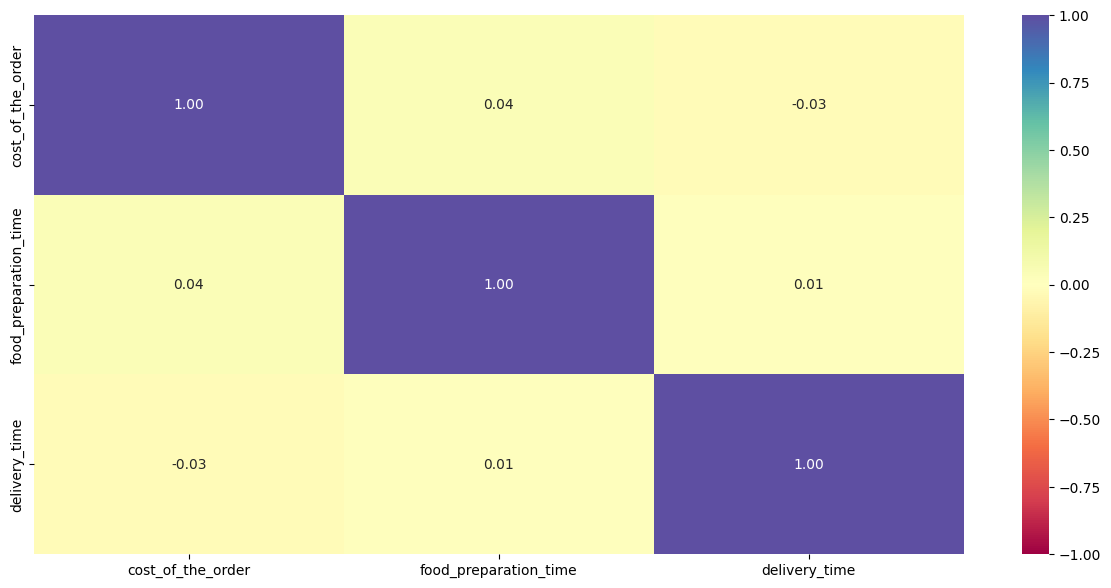

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

***Observations***

**Cost of the Order and Food Preparation Time (0.04):** There is a very weak positive correlation between the cost of the order and food preparation time. This suggests that there's almost no relationship, and the cost doesn't significantly increase with longer food preparation times.

**Cost of the Order and Delivery Time (-0.03):** There is a negligible negative correlation between the cost of the order and delivery time, indicating that there's no significant relationship where higher costs lead to longer or shorter delivery times.

**Food Preparation Time and Delivery Time (0.01):** There's an essentially nonexistent correlation between food preparation time and delivery time. This indicates that the time taken to prepare the food doesn't have a discernible impact on how long it takes to deliver the order.

From this heatmap, we can infer that within the context of this dataset, the variables are mostly independent of each other. This independence suggests that other factors not captured within these three variables might influence them. For example, delivery time might be more affected by the distance to the delivery location or traffic conditions, while food preparation time might be influenced by the complexity of the dish or the efficiency of the restaurant's kitchen staff.

For **business insights**, it indicates that focusing on optimizing any one of these variables may not necessarily have a direct impact on the others. Improvement strategies should be targeted specifically for each area (cost, preparation efficiency, or delivery performance) rather than expecting changes in one to naturally benefit the others.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)

# Find the percentage of orders that have more than 60 minutes of total delivery time
percentage_over_60 = (df['total_time'] > 60).mean() * 100

# Round the result to 2 decimal places
percentage_over_60_rounded = round(percentage_over_60, 2)
print(percentage_over_60_rounded, '% of the orders take more than 60 minutes to get delivered from the time the order is placed')




10.54 % of the orders take more than 60 minutes to get delivered from the time the order is placed


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')





The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


**Deliveries are faster on weekends**

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  **Order Ratings**: A significant portion of orders were not rated by customers, indicating an opportunity to improve customer engagement and gather more feedback to better assess satisfaction and service quality.

Supporting data:
Out of the 1,898 orders in our dataset, 736 were not rated, which is approximately 38.78% of the total orders. This high number of unrated orders suggests an opportunity for improvement in customer feedback mechanisms

*  **Cuisine Popularity**: American and Japanese cuisines emerged as the most popular choices among the orders, suggesting a strong market demand for these types of food.

Supporting Data:
American cuisine led the order count with 584 orders, followed closely by Japanese cuisine with 470 orders. These two cuisines together dominated the order volume, signaling customer preference trends

*  **Order Costs**: The cost of orders showed a right-skewed distribution, with a majority of the orders being on the lower end of the cost spectrum. High-cost orders were fewer, but they could indicate premium offerings or larger order sizes.

Supporting data:
The average cost of an order was approximately $16.50, but the cost distribution was right-skewed, indicating that while most orders were of lower cost, there is a subset of orders that are significantly more expensive

*  **Order Timing**: There was a clear preference for placing orders over the weekend, likely reflecting lifestyle patterns of the customer base, such as students and busy professionals.

Supporting data:
The orders placed on weekends amounted to 1,351, which is roughly 71.18% of all orders, suggesting a significant preference for weekend food delivery services

*  **Delivery Insights**: The delivery time analysis did not indicate significant variability between weekdays and weekends, suggesting consistent delivery performance across days. However, without the final heatmap and pointplot analyses, insights into correlations and relationships with other variables like preparation time and ratings were not conclusive.



### Recommendations:

*  **Lower the delivery time of orders.** 10% of orders take over 60 minutes for the customer to receive their food
*  **Gather more customer feedback.** Almost 40% of orders were not rated
*  **Focus on popular cuisines.** Since American and Japanese cuisines are highly popular, consider expanding offerings or featuring more restaurants from these categories to meet demand
*  **Create targeted promotions**. Use the data on popular order times to offer targeted promotions, such as weekend specials, to capitalize on higher order volumes during these peak times

Given that a substantial 71.18% of orders are placed on weekends, weekend-specific promotions or discounts could drive even higher sales during these peak times

*  **Work on menu and price optimization.** Analyze the relationship between order cost and customer satisfaction further. Consider menu pricing strategies that could increase the appeal of mid- to high-cost items without sacrificing customer satisfaction

While the mean order cost was $16.50, considering the skew in the data, it could be beneficial to examine pricing strategies that could entice customers to explore the higher-end offerings that may enhance average order value without impacting customer satisfaction negatively

*  **Improve Operational Efficiency.** Aim to maintain or improve delivery times, especially if further analysis shows a correlation with higher customer ratings. Efficient delivery remains key to customer satisfaction.
*  **Improve cuisine-Based Service Standards.** Look into preparation times for different cuisines and assess if there's a need for standardization or if the diversity in preparation times is aligned with customer expectations

---